In [2]:
import numpy as np
import matplotlib.pyplot as plt

project = 'newfault'
traindate = '2024-10-01'
testdate = '2024-10-02'
traindate_path = '/home/sdybing/gnss-picker/cnn_models_outputs/' + project + '_fq_train/models/traindate_' + traindate + '/'
test_outputs_path = traindate_path + 'data/'
figure_save_dir = traindate_path + 'figures/'

realtest_data = np.load(test_outputs_path + testdate + '_realtest_orig_data.npy')
realtest_metadata = np.load(test_outputs_path + testdate + '_realtest_metadata.npy')
realtest_target = np.load(test_outputs_path + testdate + '_realtest_target.npy')
realtest_predictions = np.load(test_outputs_path + testdate + '_realtest_predictions.npy')

num_realtest = len(realtest_predictions)
thresholds = np.arange(0, 1.005, 0.005)
test_thresholds = [0, 0.005]


In [3]:
print(realtest_data.shape)

(994155, 128, 3)


In [4]:
threshs = [0.025, 0.04, 0.135, 0.905]
thresh_names = ['0025', '004', '0135', '0905']

# threshold = 0.135
# threshold = 0.04
count = 0

for thresh in threshs:

    count += 1
    threshold = thresh
    print(thresh)
    iterate = np.arange(0,num_realtest,1)

    pred_binary = np.zeros(len(realtest_predictions)) # Same as previous code
    for k in iterate:
        i = np.where(realtest_predictions[k] >= threshold)[0]
        if len(i) == 0:
            pred_binary[k] = 0
        elif len(i) > 0:
            pred_binary[k] = 1

    targ_binary = np.zeros(len(realtest_target))
    for k in iterate:
        i = np.where(realtest_target[k] > 0)[0]
        if len(i) == 0:
            targ_binary[k] = 0
        elif len(i) > 0:
            targ_binary[k] = 1

    signals = []
    for i in iterate:
        pred = pred_binary[i]
        targ = targ_binary[i]
        if pred == 1 and targ == 1: # True positive, there was a signal and it found it
            signals.append(i) # Grab index from list of events that are correct and have a pick
        else:
            pass

    if count == 1:
        samples_off_list_a = []
        appendto = samples_off_list_a
    elif count == 2:
        samples_off_list_b = []
        appendto = samples_off_list_b
    elif count == 3:
        samples_off_list_c = []
        appendto = samples_off_list_c
    elif count == 4:
        samples_off_list_d = []
        appendto = samples_off_list_d

    for index in signals:

        # Find the peak and then the index where that peak is and compare 
        target_max_idx = np.argmax(realtest_target[index])
        pred_max_idx = np.argmax(realtest_predictions[index])
        samples_off = pred_max_idx - target_max_idx
        appendto.append(samples_off)

0.025
0.04
0.135
0.905


In [5]:
samps_off_arr = np.array(samples_off_list_c)

In [6]:
count_30_off_or_less = 0
count_20_off_or_less = 0
count_10_off_or_less = 0
count_5_off_or_less = 0
count_1_off_or_less = 0

for samp in samps_off_arr:
    if np.abs(samp) <= 30:
        count_30_off_or_less += 1
        if np.abs(samp) <= 20:
            count_20_off_or_less += 1
            if np.abs(samp) <= 10:
                count_10_off_or_less += 1
                if np.abs(samp) <= 5:
                    count_5_off_or_less += 1
                    if np.abs(samp) <= 1:
                        count_1_off_or_less += 1

print(count_30_off_or_less)
print(count_20_off_or_less)
print(count_10_off_or_less)
print(count_5_off_or_less)
print(count_1_off_or_less)

59
53
44
35
15


In [7]:
print(count_30_off_or_less/len(samps_off_arr))
print(count_20_off_or_less/len(samps_off_arr))
print(count_10_off_or_less/len(samps_off_arr))
print(count_5_off_or_less/len(samps_off_arr))
print(count_1_off_or_less/len(samps_off_arr))

0.6344086021505376
0.5698924731182796
0.4731182795698925
0.3763440860215054
0.16129032258064516


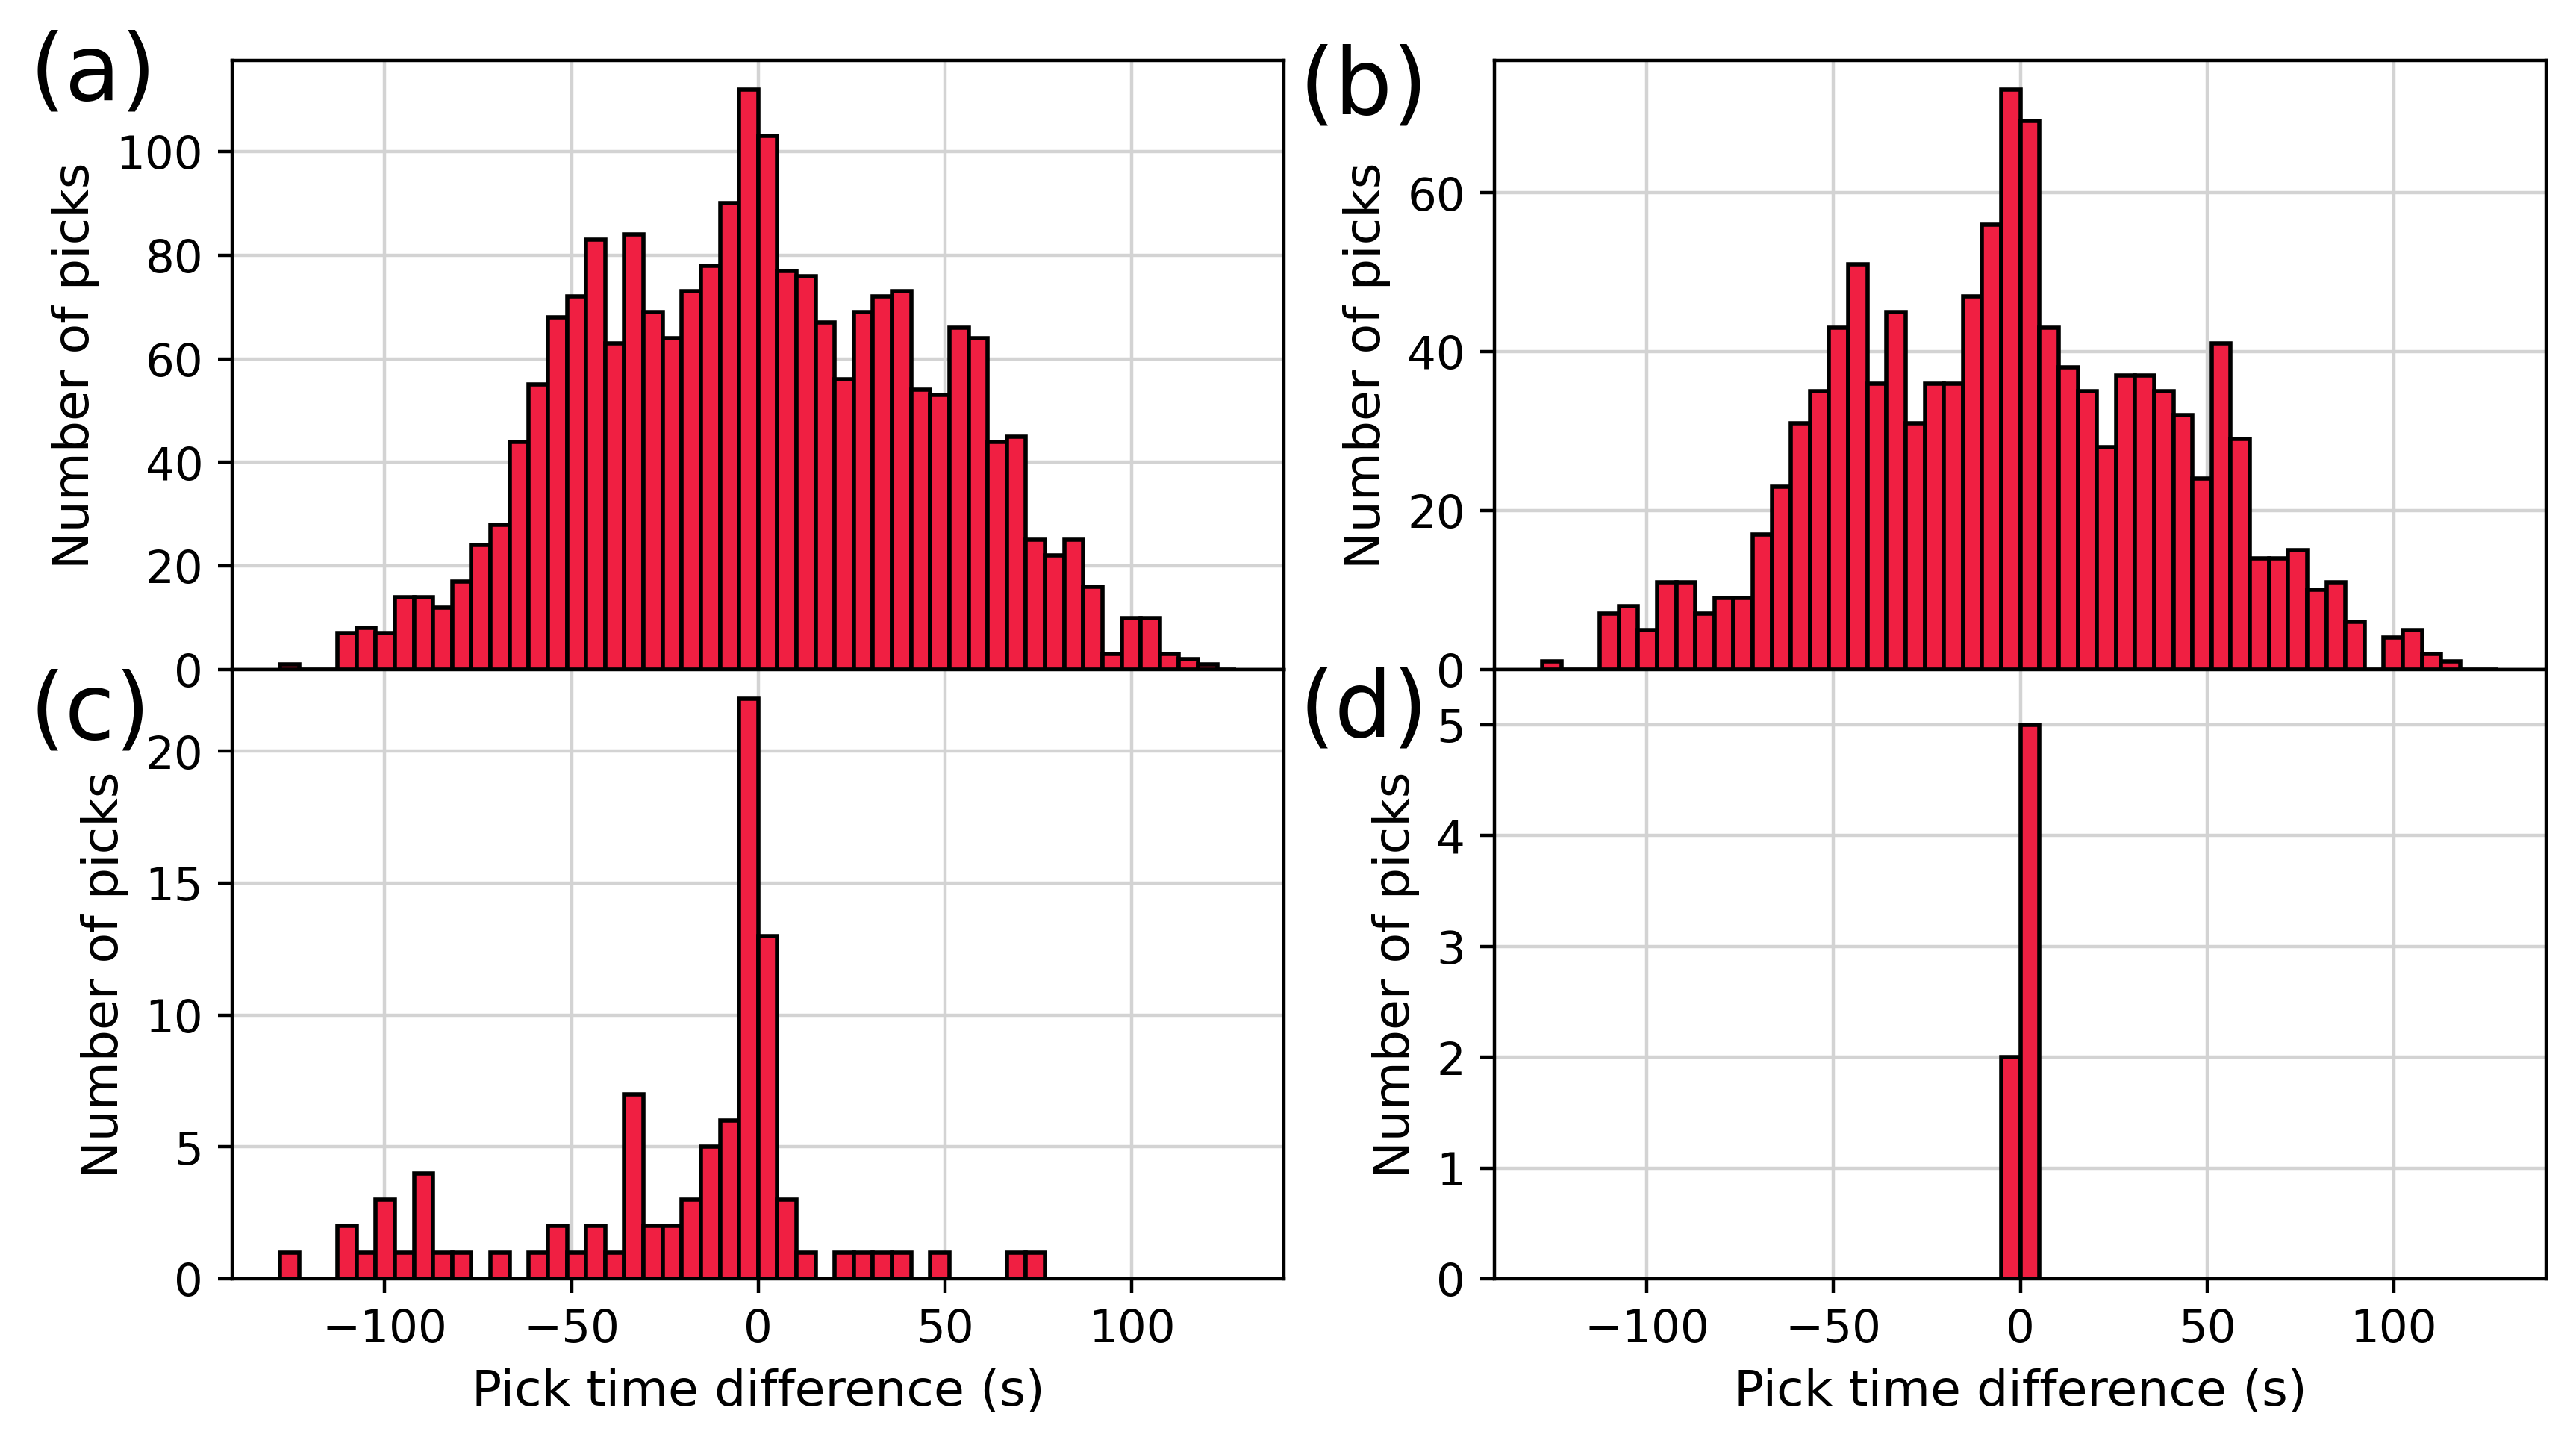

In [31]:
plt.figure(figsize = (10, 6), facecolor = 'white', dpi = 400)

plt.subplot(221)
plt.text(x = -195, y = 110, s = '(a)', fontsize = 22)
plt.hist(samples_off_list_a, range = (-128, 128), bins = 50, color = '#f01f42', edgecolor = 'black', zorder = 3)
# plt.xlim(-30,30)
plt.xlabel('Pick time difference (s)', fontsize = 12)
plt.ylabel('Number of picks', fontsize = 12)
plt.tick_params(axis = 'both', labelbottom = False, bottom = False, labelsize = 11)
plt.grid(which = 'major', color = 'lightgray', zorder = 0)

plt.subplot(222)
plt.text(x = -193, y = 70, s = '(b)', fontsize = 22)
plt.hist(samples_off_list_b, range = (-128, 128), bins = 50, color = '#f01f42', edgecolor = 'black', zorder = 3)
# plt.xlim(-30,30)
plt.xlabel('Pick time difference (s)', fontsize = 12)
plt.ylabel('Number of picks', fontsize = 12)
plt.tick_params(labelsize = 11)
plt.grid(which = 'major', color = 'lightgray', zorder = 0)

plt.subplot(223)
plt.text(x = -195, y = 20.5, s = '(c)', fontsize = 22)
plt.hist(samples_off_list_c, range = (-128, 128), bins = 50, color = '#f01f42', edgecolor = 'black', zorder = 3)
# plt.xlim(-30,30)
plt.xlabel('Pick time difference (s)', fontsize = 12)
plt.ylabel('Number of picks', fontsize = 12)
plt.tick_params(labelsize = 11)
plt.grid(which = 'major', color = 'lightgray', zorder = 0)

plt.subplot(224)
plt.text(x = -193, y = 4.9, s = '(d)', fontsize = 22)
plt.hist(samples_off_list_d, range = (-128, 128), bins = 50, color = '#f01f42', edgecolor = 'black', zorder = 3)
# plt.xlim(-30,30)
plt.ylim(0,5.5)
plt.xlabel('Pick time difference (s)', fontsize = 12)
plt.ylabel('Number of picks', fontsize = 12)
plt.tick_params(labelsize = 11)
plt.grid(which = 'major', color = 'lightgray', zorder = 0)

plt.subplots_adjust(bottom = 0.2, hspace = 0, wspace = 0.2)

plt.show()

# plt.savefig('/home/sdybing/gnss-picker/manuscript_figures/real_testdata_picktime_residuals_allthreshs.jpg', format = 'JPG')
# plt.close();

In [5]:
plt.figure(figsize = (6,4), facecolor = 'white', dpi = 400)

plt.hist(samples_off_list, bins = 50, color = '#2DADB4', edgecolor = 'black', zorder = 3)
# plt.xlim(-30,30)
plt.xlabel('Pick time difference (s)', fontsize = 12)
plt.ylabel('Number of picks', fontsize = 12)
plt.tick_params(labelsize = 11)
plt.grid(which = 'major', color = 'lightgray', zorder = 0)

plt.subplots_adjust(bottom = 0.2)

# plt.show();

plt.savefig('/home/sdybing/gnss-picker/manuscript_figures/real_testdata_picktime_residuals_thresh0025.jpg', format = 'JPG')
plt.close();

In [ ]:
np.array(samples_off_list).shape

In [ ]:
thresholds = np.array([0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]) # Not using as many as code 2

iterate = np.arange(0,num_realtest,1)
s = 0

fig = plt.subplots(nrows = 3, ncols = 4, figsize = (18,14), facecolor = 'white', dpi = 400)
# fig = plt.subplots(nrows = 3, ncols = 4, figsize = (18,14))
plt.suptitle('Target vs. Prediction Samples Off per Threshold\n(TRUE POSITIVE CASES ONLY)', fontsize = 20)

for idx in range(len(thresholds)):
    
    threshold = thresholds[idx]
    iterate = np.arange(0,num_realtest,1)
    
    pred_binary = np.zeros(len(realtest_predictions)) # Same as previous code
    for k in iterate:
        i = np.where(realtest_predictions[k] >= threshold)[0]
        if len(i) == 0:
            pred_binary[k] = 0
        elif len(i) > 0:
            pred_binary[k] = 1
    
    targ_binary = np.zeros(len(realtest_target))
    for k in iterate:
        i = np.where(realtest_target[k] > 0)[0]
        if len(i) == 0:
            targ_binary[k] = 0
        elif len(i) > 0:
            targ_binary[k] = 1
    
    signals = []
    for i in iterate:
        pred = pred_binary[i]
        targ = targ_binary[i]
        if pred == 1 and targ == 1: # True positive, there was a signal and it found it
            signals.append(i) # Grab index from list of events that are correct and have a pick
        else:
            pass
    
    # print(signals)
    
    samples_off_list = []
    
    for index in signals:
        
        # Find the peak and then the index where that peak is and compare 
        
        # print('----------------------')
        # print('Signal number: ' + str(index))
        
        target_max_idx = np.argmax(realtest_target[index])
        # print('Target: ' + str(target_max_idx))
        
        pred_max_idx = np.argmax(realtest_predictions[index])
        # print('Prediction: ' + str(pred_max_idx))
        
        samples_off = np.abs(pred_max_idx - target_max_idx)
        # print('Samples off: ' + str(samples_off))
        samples_off_list.append(samples_off)
        
    # print(samples_off_list)
    
    plt.subplot(3,4,idx+1)
    plt.hist(samples_off_list, bins = 128, range = (0,128), label = 'Threshold: ' + str(threshold), log = True)
    plt.text(s = 'Total number of\nsamps in plot: ' + str(len(samples_off_list)), x = 60, y = 1.1*10**3)
    plt.xlim(0,128)
    plt.ylim(0.5,6000)
    plt.legend()
    plt.grid(which = 'major', color = 'lightgray')
    plt.subplots_adjust(hspace = 0, wspace = 0)

    if idx == 0:
        plt.tick_params(axis = 'x', which = 'both', bottom = False, labelbottom = False)
    
    elif idx == 4:
        plt.ylabel('Number of samples in bin', fontsize = 16)
        plt.tick_params(axis = 'x', which = 'both', bottom = False, labelbottom = False)
#         plt.yticks([0, 50, 100, 150, 200, 250])
        
    elif idx == 8:
        pass
#         plt.yticks([0, 50, 100, 150, 200, 250])
        
    elif idx == 9:
        plt.xlabel('Absolute seconds off target position', fontsize = 16)
        plt.tick_params(axis = 'y', which = 'both', left = False, labelleft = False)
        
    elif idx == 10:     
        plt.tick_params(axis = 'y', which = 'both', left = False, labelleft = False)
        
    else:
        plt.tick_params(axis = 'x', which = 'both', bottom = False, labelbottom = False)
        plt.tick_params(axis = 'y', which = 'both', left = False, labelleft = False)
    
    plt.subplot(3,4,12)
    plt.tick_params(axis = 'x', which = 'both', bottom = False, labelbottom = False)
    plt.tick_params(axis = 'y', which = 'both', left = False, labelleft = False)

# plt.show();
plt.savefig(figure_save_dir + '16b_realtestdata_gauss_position_analysis.png', format='PNG')
plt.close();